## Loading libraries and data

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
import time

In [5]:
life = pd.read_csv('train.csv')
# change status to a numerical variable
life['developing'] = life.status.apply(lambda x: 1 if x=='Developing'
                       else 0)
#group data by country and recieve mean
train = life.groupby('country').mean()

In [6]:
#drop year from dataset as no longer useful after grouping
train = train.reset_index()
train = train.drop(['year'], axis=1)

In [18]:
train.head()

,country,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitisB,measles,BMI,under_five_deaths,...,total_expenditure,diphtheria,HIV_AIDS,GDP,Population,thinness_1_19_years,thinness_5_9_years,income_composition_of_resources,schooling,developing
0,Afghanistan,58.19375,269.0625,78.2500,0.014375,34.960110,64.562500,2362.2500,15.51875,107.5625,...,8.252500,52.3125,0.10000,340.015425,9.972260e+06,16.58125,15.58125,0.415375,8.21250,1.0
1,Albania,75.15625,45.0625,0.6875,4.848750,193.259091,98.000000,53.3750,49.06875,0.9375,...,5.945625,98.0625,0.10000,2119.726679,6.969116e+05,1.61875,1.70000,0.709875,12.13750,1.0
2,Algeria,73.61875,108.1875,20.3125,0.406667,236.185241,78.000000,1943.8750,48.74375,23.5000,...,4.604000,91.8750,0.10000,2847.853392,2.164983e+07,6.09375,5.97500,0.694875,12.71250,1.0
3,Angola,49.01875,328.5625,83.7500,5.740667,102.100268,70.222222,3561.3125,18.01875,132.6250,...,3.919333,47.6875,2.36875,1975.143045,1.014710e+07,6.19375,6.66875,0.458375,8.04375,1.0
4,Antigua and Barbuda,75.05625,127.5000,0.0000,7.949333,1001.585226,98.266667,0.0000,38.42500,0.0000,...,4.791333,98.3125,0.12500,9759.305728,NaN,3.42500,3.37500,0.488625,8.84375,1.0


<AxesSubplot:xlabel='status', ylabel='life_expectancy'>

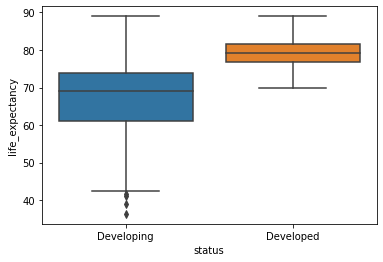

In [13]:
#Plot difference for life_expectancy between developing and developed countries
sns.boxplot(x = 'status', y = 'life_expectancy', data = life)

## Finding and removing missing values (for now)

In [7]:
train.isnull().sum().sort_values()

country                             0
HIV_AIDS                            0
diphtheria                          0
under_five_deaths                   0
measles                             0
polio                               0
infant_deaths                       0
percentage_expenditure              0
developing                          0
alcohol                             2
total_expenditure                   2
BMI                                 4
thinness_1_19_years                 4
thinness_5_9_years                  4
hepatitisB                          9
adult_mortality                    10
life_expectancy                    10
schooling                          13
income_composition_of_resources    17
GDP                                30
Population                         48
dtype: int64

In [9]:
train = train.dropna()

In [10]:
train.isnull().sum().sort_values()

country                            0
income_composition_of_resources    0
thinness_5_9_years                 0
thinness_1_19_years                0
Population                         0
GDP                                0
HIV_AIDS                           0
diphtheria                         0
total_expenditure                  0
schooling                          0
polio                              0
BMI                                0
measles                            0
hepatitisB                         0
percentage_expenditure             0
alcohol                            0
infant_deaths                      0
adult_mortality                    0
life_expectancy                    0
under_five_deaths                  0
developing                         0
dtype: int64

In [23]:
train.shape

(133, 21)

## Investigating correlation

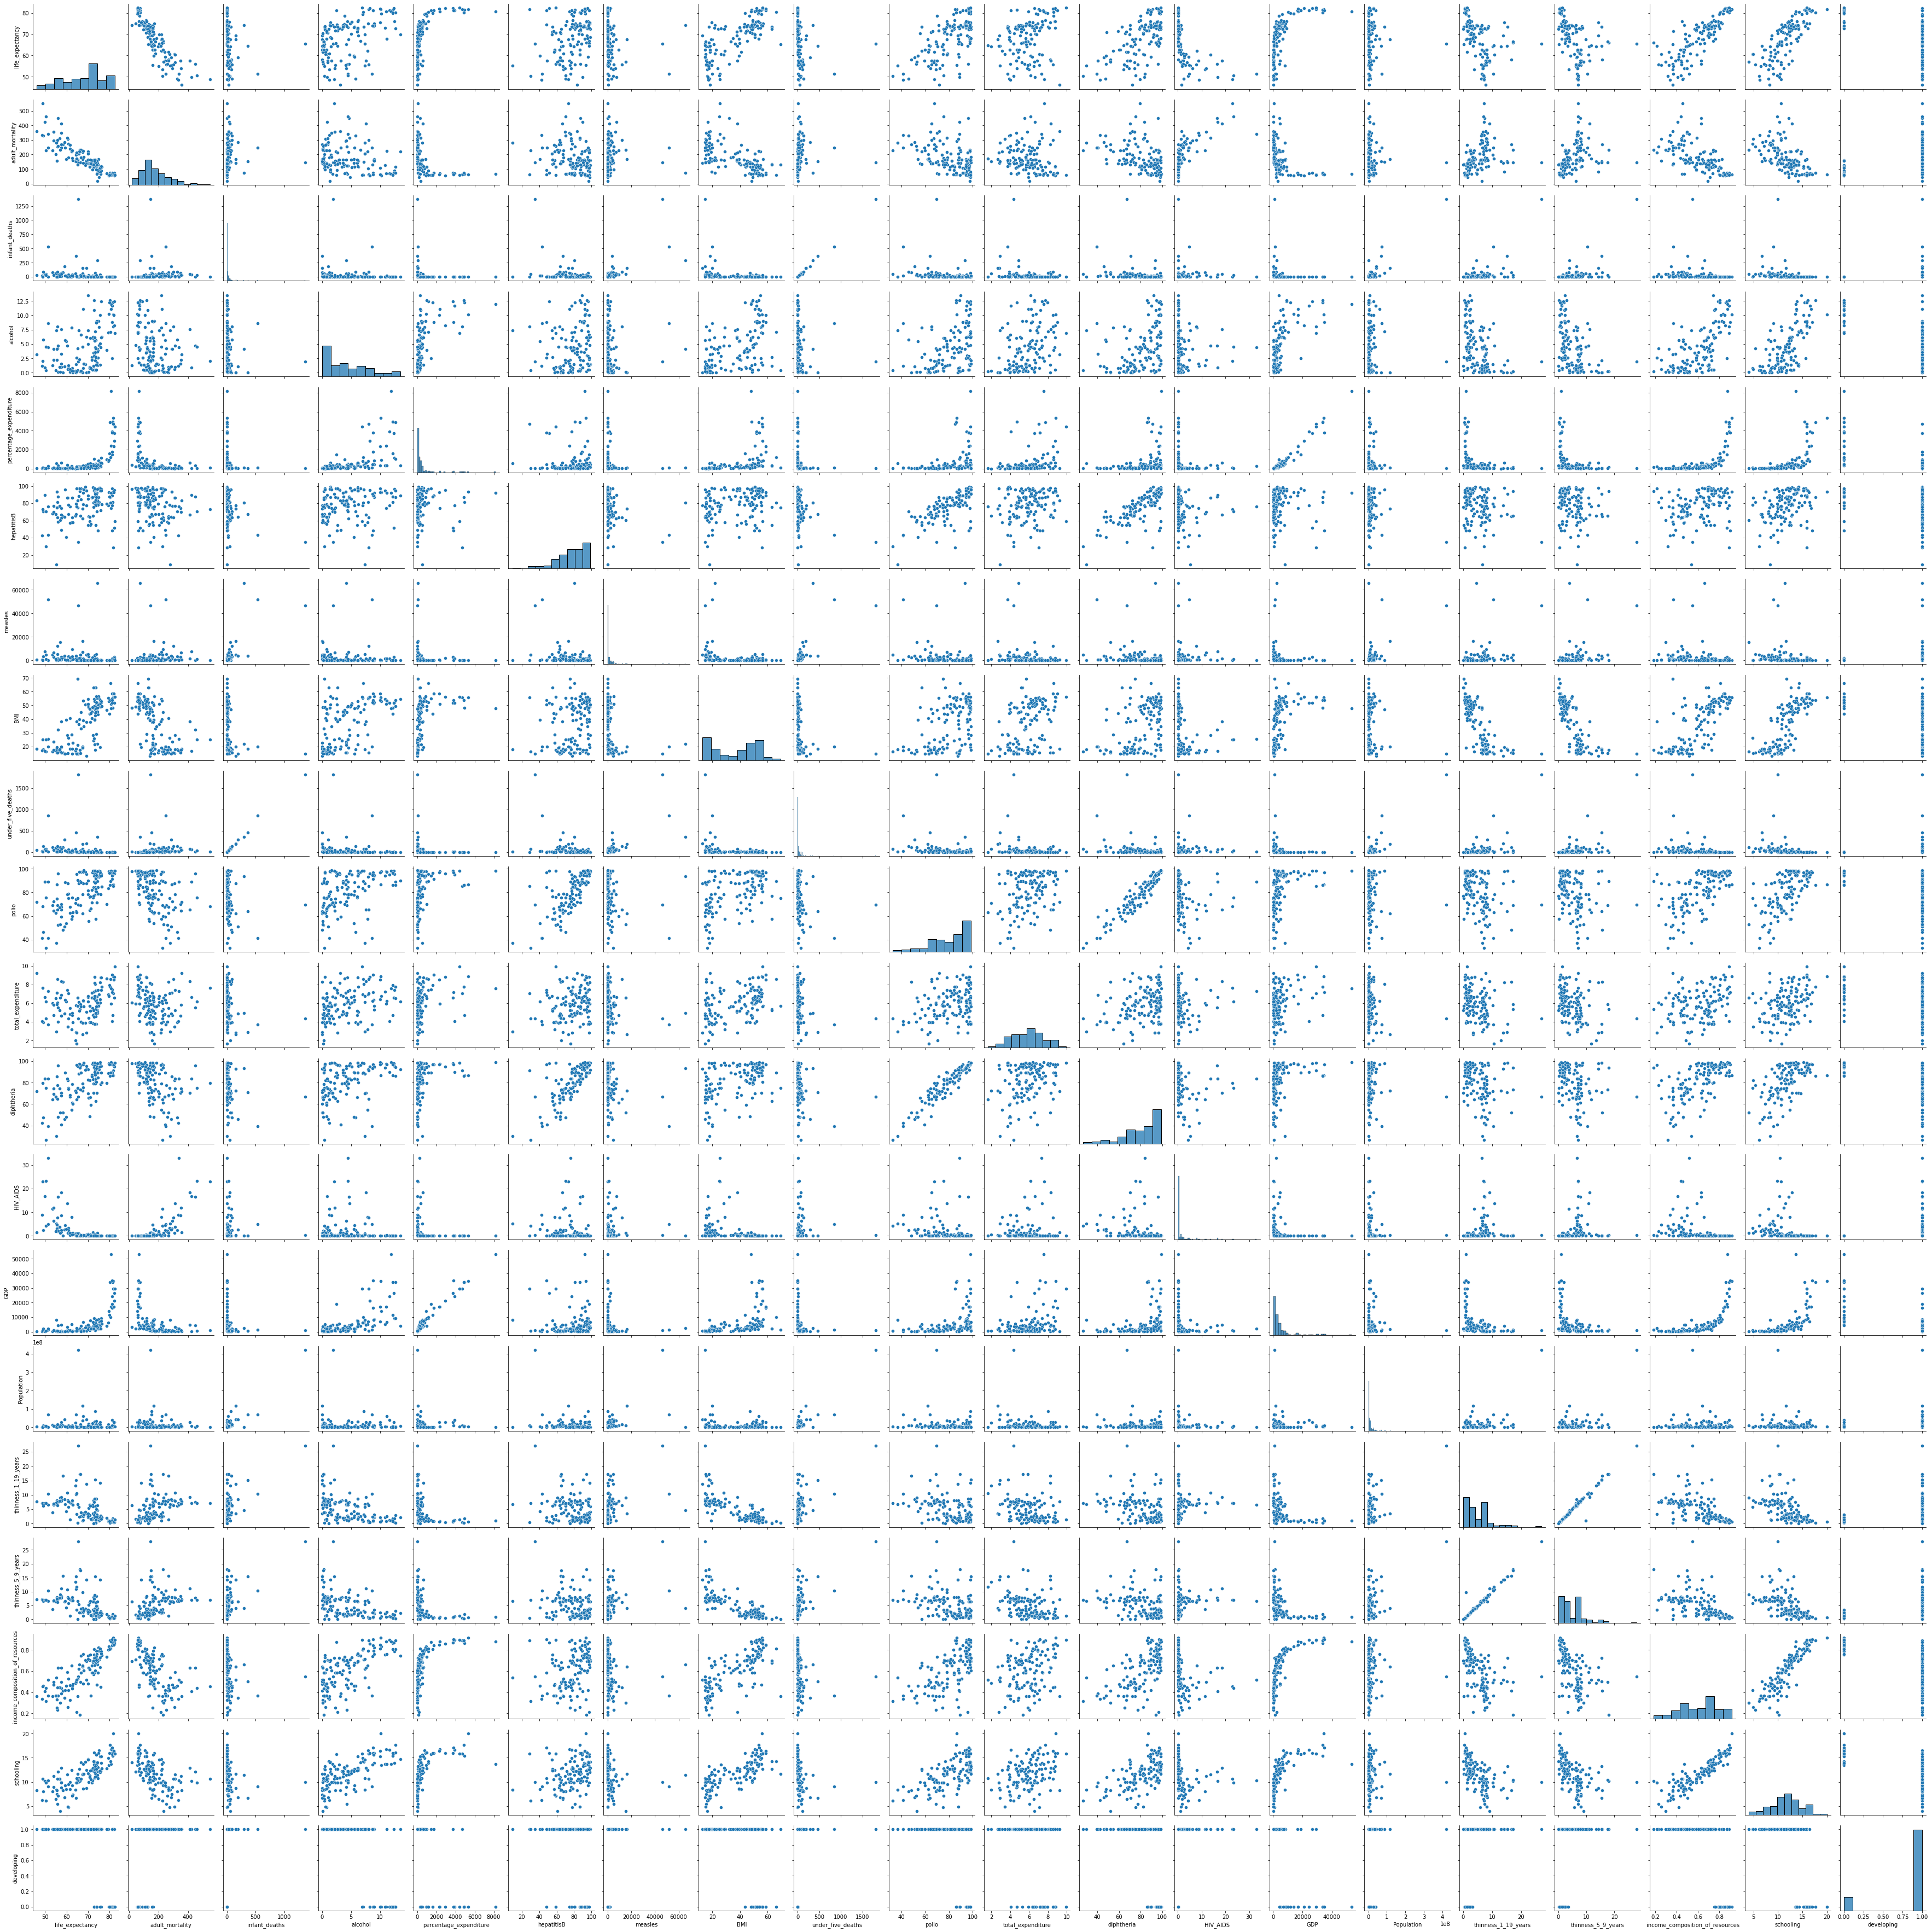

In [11]:
sns.pairplot(train)

In [25]:
train.corrwith(train.life_expectancy).sort_values()

adult_mortality                   -0.877687
HIV_AIDS                          -0.600072
thinness_1_19_years               -0.506943
thinness_5_9_years                -0.495230
developing                        -0.476775
under_five_deaths                 -0.190052
infant_deaths                     -0.163580
measles                           -0.158951
Population                        -0.023562
total_expenditure                  0.274914
hepatitisB                         0.333752
alcohol                            0.456047
percentage_expenditure             0.540505
GDP                                0.584426
diphtheria                         0.636588
polio                              0.640548
BMI                                0.754873
schooling                          0.782516
income_composition_of_resources    0.817821
life_expectancy                    1.000000
dtype: float64

## VIF

In [29]:
train.columns

Index(['country', 'life_expectancy', 'adult_mortality', 'infant_deaths',
       'alcohol', 'percentage_expenditure', 'hepatitisB', 'measles', 'BMI',
       'under_five_deaths', 'polio', 'total_expenditure', 'diphtheria',
       'HIV_AIDS', 'GDP', 'Population', 'thinness_1_19_years',
       'thinness_5_9_years', 'income_composition_of_resources', 'schooling',
       'developing'],
      dtype='object')

In [30]:
X = train[['adult_mortality',
       'alcohol', 'percentage_expenditure', 'hepatitisB', 'BMI', 'polio',
        'total_expenditure', 'diphtheria',
       'HIV_AIDS', 'GDP', 'thinness_1_19_years',
       'thinness_5_9_years', 'income_composition_of_resources', 'schooling']]

In [32]:
X.columns[1:]

Index(['adult_mortality', 'alcohol', 'percentage_expenditure', 'hepatitisB',
       'BMI', 'polio', 'total_expenditure', 'diphtheria', 'HIV_AIDS', 'GDP',
       'thinness_1_19_years', 'thinness_5_9_years',
       'income_composition_of_resources', 'schooling'],
      dtype='object')

In [33]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
X = add_constant(X)
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

for i in range(len(X.columns)):
    vif_data.loc[i,'VIF'] = variance_inflation_factor(X.values, i)

print(vif_data)

                            feature         VIF
0                             const  111.559380
1                   adult_mortality    4.272967
2                           alcohol    2.442797
3            percentage_expenditure   30.845697
4                        hepatitisB    2.998047
5                               BMI    5.032397
6                             polio   11.620895
7                 total_expenditure    1.482526
8                        diphtheria   12.067015
9                          HIV_AIDS    2.619534
10                              GDP   35.255870
11              thinness_1_19_years   31.278995
12               thinness_5_9_years   32.441967
13  income_composition_of_resources    5.944956
14                        schooling    6.484708


/Users/blankajarmoszko/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [34]:
train.corr()

,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitisB,measles,BMI,under_five_deaths,polio,total_expenditure,diphtheria,HIV_AIDS,GDP,Population,thinness_1_19_years,thinness_5_9_years,income_composition_of_resources,schooling,developing
life_expectancy,1.000000,-0.877687,-0.163580,0.456047,0.540505,0.333752,-0.158951,0.754873,-0.190052,0.640548,0.274914,0.636588,-0.600072,0.584426,-0.023562,-0.506943,-0.495230,0.817821,0.782516,-0.476775
adult_mortality,-0.877687,1.000000,0.052508,-0.276433,-0.416904,-0.190935,0.045912,-0.614093,0.072298,-0.443953,-0.155017,-0.417253,0.731090,-0.448948,-0.023573,0.390085,0.391755,-0.610973,-0.554374,0.384798
infant_deaths,-0.163580,0.052508,1.000000,-0.108648,-0.116911,-0.298115,0.730379,-0.281420,0.996922,-0.224021,-0.200922,-0.216586,0.000143,-0.127314,0.905898,0.536080,0.538977,-0.151371,-0.198182,0.107597
alcohol,0.456047,-0.276433,-0.108648,1.000000,0.588493,0.164300,-0.055363,0.504825,-0.104216,0.399188,0.356797,0.379951,-0.071651,0.631811,-0.038389,-0.477945,-0.462651,0.651273,0.672403,-0.650932
percentage_expenditure,0.540505,-0.416904,-0.116911,0.588493,1.000000,0.015150,-0.119944,0.419319,-0.120538,0.313223,0.331822,0.306870,-0.151574,0.980601,-0.041730,-0.374200,-0.373701,0.581997,0.573334,-0.647486
hepatitisB,0.333752,-0.190935,-0.298115,0.164300,0.015150,1.000000,-0.244663,0.248804,-0.311966,0.733854,0.217880,0.750264,-0.147364,0.038848,-0.222068,-0.210622,-0.219602,0.282503,0.344250,-0.197441
measles,-0.158951,0.045912,0.730379,-0.055363,-0.119944,-0.244663,1.000000,-0.288211,0.739258,-0.201307,-0.183938,-0.197878,0.017269,-0.126008,0.523922,0.324725,0.325463,-0.142484,-0.171563,0.109136
BMI,0.754873,-0.614093,-0.281420,0.504825,0.419319,0.248804,-0.288211,1.000000,-0.294589,0.491600,0.413732,0.473657,-0.329246,0.473125,-0.142385,-0.746248,-0.749584,0.718803,0.755723,-0.422406
under_five_deaths,-0.190052,0.072298,0.996922,-0.104216,-0.120538,-0.311966,0.739258,-0.294589,1.000000,-0.250993,-0.201483,-0.244380,0.012154,-0.132356,0.890828,0.537496,0.538750,-0.172836,-0.215238,0.110376
polio,0.640548,-0.443953,-0.224021,0.399188,0.313223,0.733854,-0.201307,0.491600,-0.250993,1.000000,0.294446,0.950831,-0.214078,0.357642,-0.096655,-0.353144,-0.342677,0.601943,0.632187,-0.350538


## Adding status ( developing/developed) back into the dataset

In [24]:
train['status'] = life.developing.apply(lambda x: 'developing' if x==1
                       else 'developed')

## Checking VIF after removing variables that had collinearity

In [17]:
X = train[['adult_mortality',
       'percentage_expenditure','BMI', 'polio',
        'total_expenditure', 'diphtheria',
       'HIV_AIDS', 'thinness_1_19_years',
       'income_composition_of_resources', 'schooling','developing']]

In [13]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
X = add_constant(X)
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

for i in range(len(X.columns)):
    vif_data.loc[i,'VIF'] = variance_inflation_factor(X.values, i)

print(vif_data)

                            feature         VIF
0                             const  130.251267
1                   adult_mortality    3.974809
2            percentage_expenditure    2.175602
3                               BMI    4.731633
4                             polio   11.125778
5                 total_expenditure    1.420606
6                        diphtheria   10.872139
7                          HIV_AIDS    2.526207
8               thinness_1_19_years    2.388877
9   income_composition_of_resources    5.422763
10                        schooling    6.045782
11                       developing    1.889527


/Users/blankajarmoszko/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


## Finding best subset of variables by code

In [26]:
X = train[['adult_mortality',
       'percentage_expenditure','BMI', 'polio',
        'total_expenditure', 'diphtheria',
       'HIV_AIDS', 'thinness_1_19_years',
       'income_composition_of_resources', 'schooling','status']]

In [27]:
def processSubset(predictor_subset):
    # Fit model on feature_set and calculate R-squared
    model = sm.ols('life_expectancy~' + '+'.join(predictor_subset),data = train).fit()
    Rsquared = model.rsquared
    return {"model":model, "Rsquared":Rsquared}

In [28]:
def getBest_model(k):
    tic = time.time()
    results = []
    for combo in itertools.combinations(X.columns, k):
        results.append(processSubset((list(combo))))

    # Wrap everything up in a dataframe
    models = pd.DataFrame(results)

    # Choose the model with the highest RSS
    best_model = models.loc[models['Rsquared'].argmax()]
    
    toc = time.time()
    print("Processed", models.shape[0], "models on", k, "predictors in", (toc-tic), "seconds.")
    return best_model

In [29]:
models_best = pd.DataFrame(columns=["Rsquared", "model"])

tic = time.time()
for i in range(1,1+X.shape[1]):
    models_best.loc[i] = getBest_model(i)

toc = time.time()
print("Total elapsed time:", (toc-tic), "seconds.")

Processed 11 models on 1 predictors in 0.07513999938964844 seconds.
Processed 55 models on 2 predictors in 0.2765319347381592 seconds.
Processed 165 models on 3 predictors in 0.8329122066497803 seconds.
Processed 330 models on 4 predictors in 2.1208879947662354 seconds.
Processed 462 models on 5 predictors in 3.03043270111084 seconds.
Processed 462 models on 6 predictors in 4.153858661651611 seconds.
Processed 330 models on 7 predictors in 3.0714001655578613 seconds.
Processed 165 models on 8 predictors in 1.8283779621124268 seconds.
Processed 55 models on 9 predictors in 0.9000298976898193 seconds.
Processed 11 models on 10 predictors in 0.18665504455566406 seconds.
Processed 1 models on 11 predictors in 0.017849206924438477 seconds.
Total elapsed time: 16.550960063934326 seconds.


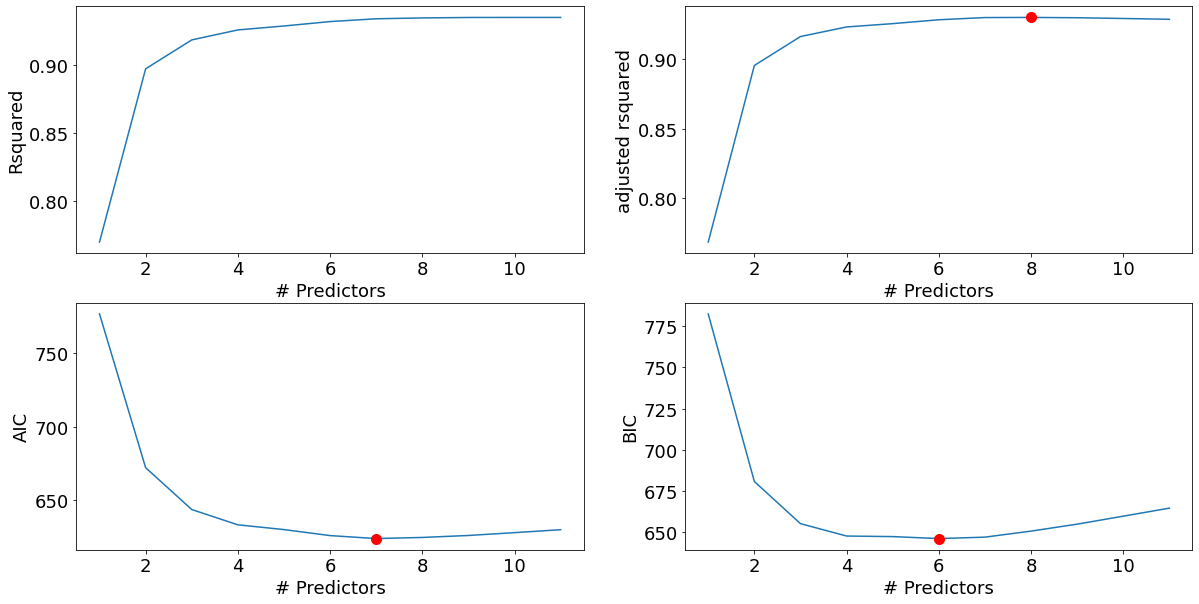

In [30]:
def best_sub_plots():
    plt.figure(figsize=(20,10))
    plt.rcParams.update({'font.size': 18, 'lines.markersize': 10})

    # Set up a 2x2 grid so we can look at 4 plots at once
    plt.subplot(2, 2, 1)

    # We will now plot a red dot to indicate the model with the largest adjusted R^2 statistic.
    # The argmax() function can be used to identify the location of the maximum point of a vector
    plt.plot(models_best["Rsquared"])
    plt.xlabel('# Predictors')
    plt.ylabel('Rsquared')

    # We will now plot a red dot to indicate the model with the largest adjusted R^2 statistic.
    # The argmax() function can be used to identify the location of the maximum point of a vector

    rsquared_adj = models_best.apply(lambda row: row[1].rsquared_adj, axis=1)

    plt.subplot(2, 2, 2)
    plt.plot(rsquared_adj)
    plt.plot(1+rsquared_adj.argmax(), rsquared_adj.max(), "or")
    plt.xlabel('# Predictors')
    plt.ylabel('adjusted rsquared')

    # We'll do the same for AIC and BIC, this time looking for the models with the SMALLEST statistic
    aic = models_best.apply(lambda row: row[1].aic, axis=1)

    plt.subplot(2, 2, 3)
    plt.plot(aic)
    plt.plot(1+aic.argmin(), aic.min(), "or")
    plt.xlabel('# Predictors')
    plt.ylabel('AIC')

    bic = models_best.apply(lambda row: row[1].bic, axis=1)

    plt.subplot(2, 2, 4)
    plt.plot(bic)
    plt.plot(1+bic.argmin(), bic.min(), "or")
    plt.xlabel('# Predictors')
    plt.ylabel('BIC')
best_sub_plots()

## Developing a model with the subset

In [33]:
best_subset_model = models_best.loc[7,'model']
model = models_best.loc[7,'model']
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        life_expectancy   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     250.2
Date:                Mon, 27 Feb 2023   Prob (F-statistic):           2.48e-70
Time:                        14:36:00   Log-Likelihood:                -304.01
No. Observations:                 133   AIC:                             624.0
Df Residuals:                     125   BIC:                             647.1
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                          55.7899      1.745     31.971      0.000      52.336      59.244
adult_mortality                    -0.0440      0.004    -10.208      0.000      -0.053      -0.035
percentage_expenditure              0.0004      0.000      1.960      0.052   -4.15e-06       0.001
BMI                                 0.0636      0.022      2.883      0.005       0.020       0.107
diphtheria                          0.0946      0.017      5.608      0.000       0.061       0.128
HIV_AIDS                           -0.1838      0.065     -2.808      0.006      -0.313      -0.054
income_composition_of_resources    10.0182      2.741      3.655      0.000       4.593      15.443
schooling                           0.3502      0.171      2.045      0.043       0.011       0.689
==============================================================================
Omnibus:                        6.265   Durbin-Watson:                   2.169
Prob(Omnibus):                  0.044   Jarque-Bera (JB):                5.985
Skew:                          -0.413   Prob(JB):                       0.0502
Kurtosis:                       3.631   Cond. No.                     1.86e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.86e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [45]:
pred_price = model.predict(train)
rmse = np.sqrt(((train.life_expectancy-pred_price)**2).mean())
rmse

2.379343190255432

## Investigating Interaction- cannot do without test dataset?

In [42]:
#Creating a dataframe with all the predictors
X = X = train[['adult_mortality',
       'percentage_expenditure','BMI', 'polio',
        'total_expenditure', 'diphtheria',
       'HIV_AIDS', 'thinness_1_19_years',
       'income_composition_of_resources', 'schooling','status']]
#Since 'X' will change when we include interactions, we need a backup containing all individual predictors
X_backup = X = train[['adult_mortality',
       'percentage_expenditure','BMI', 'polio',
        'total_expenditure', 'diphtheria',
       'HIV_AIDS', 'thinness_1_19_years',
       'income_composition_of_resources', 'schooling','status']]

In [46]:
#Including 2-factor interactions of predictors in train and 'X'. Note that we need train to develop the model, and X to 
#find 'k' variable subsets from amongst all the predictors under consideration
# for combo in itertools.combinations(X_backup.columns, 2):    
#     train['_'.join(combo)] = train[combo[0]]*train[combo[1]]
#     #test['_'.join(combo)] = test[combo[0]]*test[combo[1]]
#     X.loc[:,'_'.join(combo)] = train.loc[:,'_'.join(combo)] 